<b>Teoretiska Frågor</b>
1. Beskriv kort hur en relationsdatabas fungerar.

    En relationsdatabas organiserar data i "tables" som består av rader och kolumner. Primary keys och foreign keys (likt python dictionaries key-value) används för att hänvisa till olika tables.

2. Vad menas med “CRUD”-flödet?

    "CRUD"-flödet står för de operationer som man kan göra i sin data:
    Create, Read, Update och Delete

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?

    Left join används för att retunera alla rader i ett table samt matchande rader i ett annat table. Man kan se det som alla element i A i ett klassiskt venn-diagram.
    Inner join blir A snitt B, alltså retuneras alla rader som matchar både i första (left) och andra (right) tabellen.
    
4. Beskriv kort vad indexering i SQL innebär.

    Indexering skapar en ytterligare datastruktur som hänvisar till specifika rader och kolumner. Genom att organisera data för snabbare sökning gör indexering queries mer effektiva och snabba.
    
5. Beskriv kort vad en vy i SQL är.

    Resultatet från en query. Påverkar ej underliggande data.

6. Beskriv kort vad en lagrad procedur i SQL är.

    Sparade queries som kan köras vid behov. Kan användas till att t.ex automatisera uppgifter eller återanvända upprepande eftersökta queries.
    

<b>--- Programmeringsuppgift --- </b>

Connect to database

In [120]:
import pyodbc

# Define connection parameters
server = 'localhost'  # or the server name you used in VS Code
database = 'AdventureWorks2022'
driver = '{ODBC Driver 17 for SQL Server}'  # Make sure this driver is installed

# Create the connection string with Windows Authentication
connection_string = f"""
    DRIVER={driver};
    SERVER={server};
    DATABASE={database};
    Trusted_Connection=yes;
"""

try:
    # Establish connection
    conn = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error connecting to database:", e)


Connection successful!


Function for fetching data from database

In [121]:
import pandas as pd

def run_query(query):
    server = 'localhost'
    database = 'AdventureWorks2022'
    driver = '{ODBC Driver 17 for SQL Server}'

    connection_string = f"""
        DRIVER={driver};
        SERVER={server};
        DATABASE={database};
        Trusted_Connection=yes;
    """
    
    try:
        with pyodbc.connect(connection_string) as conn:  
            df = pd.read_sql(query, conn)
            return df  # Return DataFrame for further processing/display

    except Exception as e:
        print("Error executing query:", e)
        return None

<b>1. Descriptive summary of database:</b>

By looking at table schemas we get an idea of what the database contains. It contains tables with the schemas HumanResources, Person, Production, Purchasing, Sales and dbo.
This allows us to draw the conclusion that AdventureWorks produces and sells some type of item.

Looking closer at the ProductDescription table we find that AdventureWorks sells bicycles. As we are only takeing a glance at the avalible product descriptions we don't really know if they sell other products as well, however it is clear that they sell bicycles.

In [133]:
query_tables = """
SELECT DISTINCT TABLE_SCHEMA 
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE';
"""
df_tables = run_query(query_tables)
if df_tables is not None:
    display(df_tables)

query_product_description = """
SELECT TOP 15 Description
FROM Production.ProductDescription;
"""

df_product_description = run_query(query_product_description)
if df_product_description is not None:
    display(df_product_description)

C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,TABLE_SCHEMA
0,dbo
1,HumanResources
2,Person
3,Production
4,Purchasing
5,Sales


C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Description
0,Chromoly steel.
1,Aluminum alloy cups; large diameter spindle.
2,Aluminum alloy cups and a hollow axle.
3,"Suitable for any type of riding, on or off-roa..."
4,This bike delivers a high-level of performance...
5,For true trail addicts. An extremely durable ...
6,Serious back-country riding. Perfect for all l...
7,Top-of-the-line competition mountain bike. Per...
8,Suitable for any type of off-road trip. Fits a...
9,Entry level adult bike; offers a comfortable r...


<b>2. Statistical analysis </b>

Looking at Person.StateProvince we can see data of customer origin. By looking at the CountryRegionCode we can produce a pie chart deomstrating customers per country. In total there is 179 customers in the table.

C:\Users\Isaac\AppData\Local\Temp\ipykernel_8788\2716349532.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


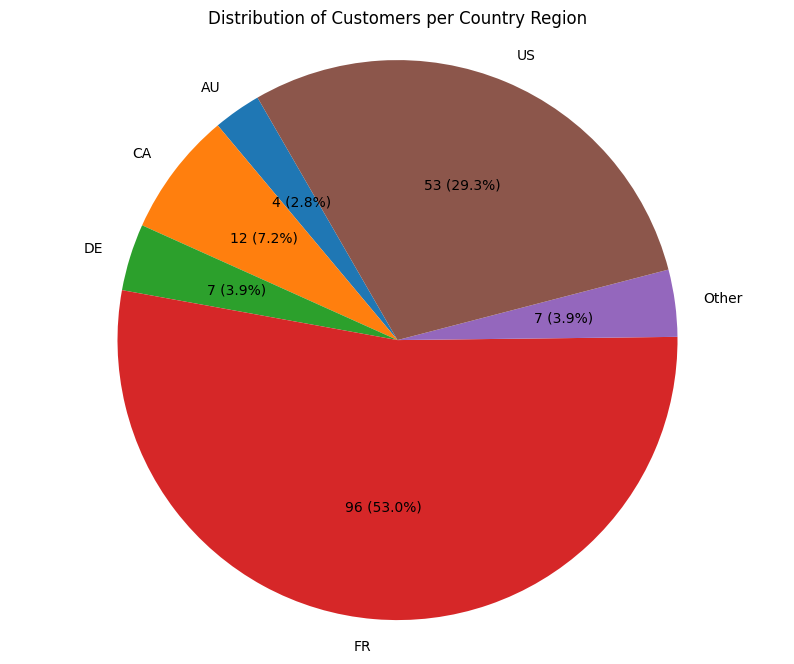

In [136]:
query_person_state_province = """
SELECT CountryRegionCode, COUNT(*) AS [RowCount]
FROM Person.StateProvince
GROUP BY CountryRegionCode
ORDER BY [RowCount] DESC;
"""

df_customer_country = run_query(query_person_state_province)
if df_customer_country is not None:
    # Bundle countries with only 1 RowCount as "Other"
    df_customer_country['CountryRegionCode'] = df_customer_country.apply(
        lambda row: 'Other' if row['RowCount'] == 1 else row['CountryRegionCode'], axis=1
    )

    # Group by the new CountryRegionCode to sum the RowCounts
    df_grouped = df_customer_country.groupby('CountryRegionCode', as_index=False).sum()

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        df_grouped['RowCount'], 
        labels=df_grouped['CountryRegionCode'], 
        autopct=lambda p: f'{int(p * sum(df_grouped["RowCount"]) / 100)} ({p:.1f}%)', 
        startangle=120
    )
    
    plt.title('Distribution of Customers per Country Region')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()